In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/Users/aljawharah/Downloads/Student_Performance.csv")

In [5]:
print("shape:",df.shape)
print(df.head)

shape: (10007, 6)
<bound method NDFrame.head of        Hours Studied  Previous Scores  Extracurricular Activities  \
0                  7             99.0                         1.0   
1                  4             82.0                         0.0   
2                  8             51.0                         1.0   
3                  5             52.0                         1.0   
4                  7             75.0                         0.0   
...              ...              ...                         ...   
10002              1             60.0                         1.0   
10003              1             84.0                         0.0   
10004              5             62.0                         1.0   
10005              2             52.0                         1.0   
10006              7             79.0                         0.0   

       Sleep Hours  Sample Question Papers Practiced  Target  
0              9.0                               1.0    91.0

In [6]:
df.info

<bound method DataFrame.info of        Hours Studied  Previous Scores  Extracurricular Activities  \
0                  7             99.0                         1.0   
1                  4             82.0                         0.0   
2                  8             51.0                         1.0   
3                  5             52.0                         1.0   
4                  7             75.0                         0.0   
...              ...              ...                         ...   
10002              1             60.0                         1.0   
10003              1             84.0                         0.0   
10004              5             62.0                         1.0   
10005              2             52.0                         1.0   
10006              7             79.0                         0.0   

       Sleep Hours  Sample Question Papers Practiced  Target  
0              9.0                               1.0    91.0  
1            

In [8]:
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     5
Extracurricular Activities          5
Sleep Hours                         5
Sample Question Papers Practiced    5
Target                              4
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

print(df.isna().sum()) 


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Target                              0
dtype: int64


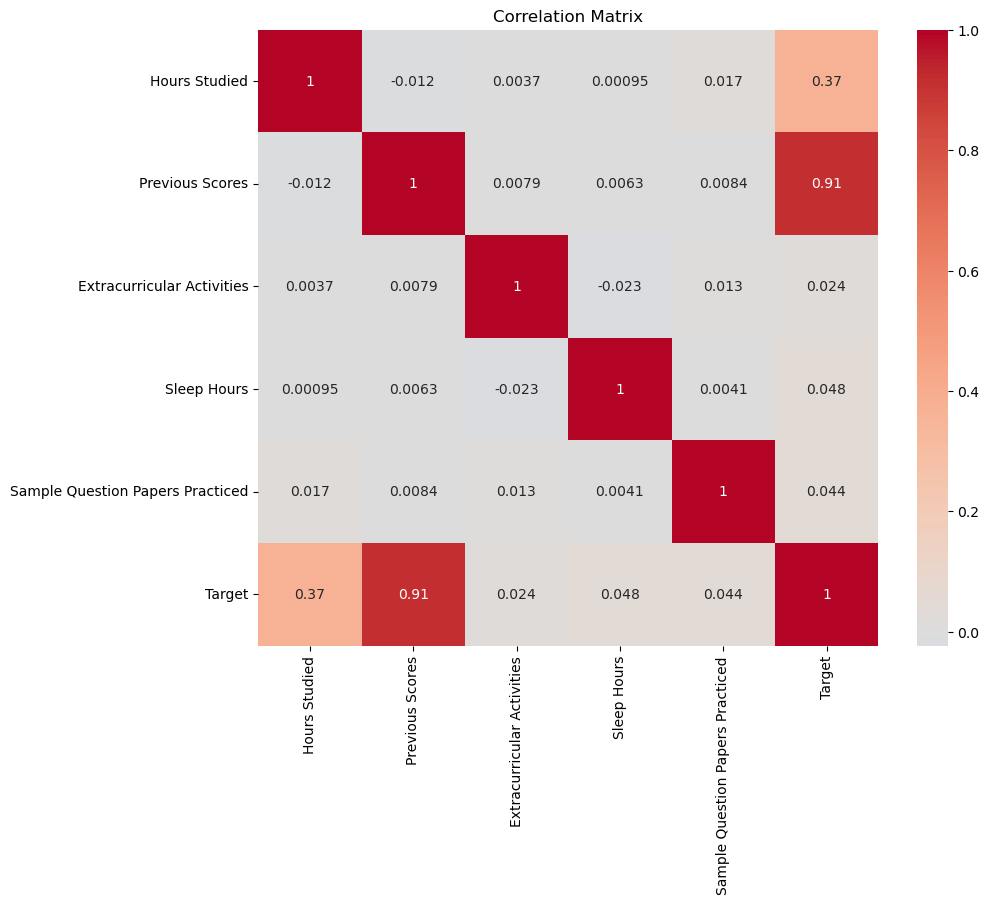

In [13]:
# Check the correlation between features and target
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Features (X) and Target (y)
X = df.drop('Target', axis=1)  # All columns except Target
y = df['Target']  # Target column

In [15]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:

# Make predictions
y_pred = model.predict(X_test)

In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [19]:

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 4.24
Root Mean Squared Error (RMSE): 2.06
R-squared (R²): 0.9884


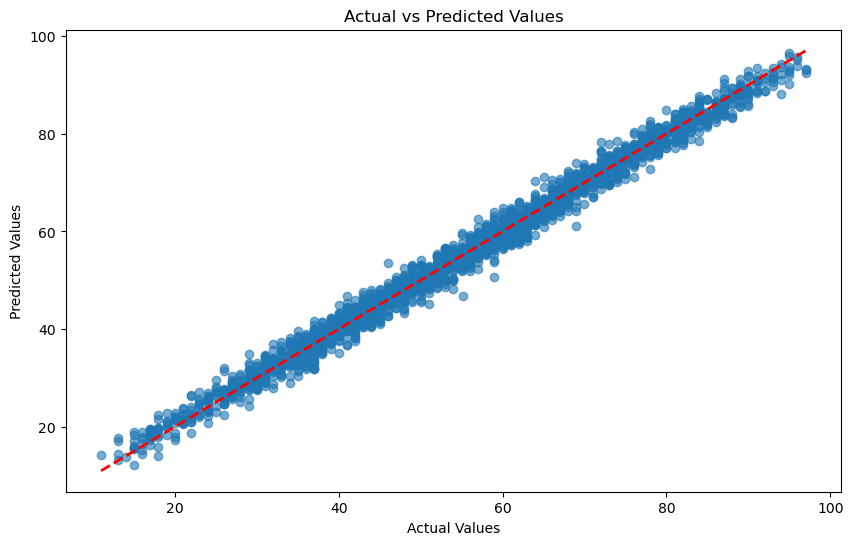

In [21]:

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
